In [1]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Step 1: scrape competitor's data

import requests
from bs4 import BeautifulSoup
import pandas as pd

# scrape data 
r = requests.get("https://cmsc320.github.io/files/top-50-solar-flares.html")
txt = r.text
soup = BeautifulSoup(txt, "html.parser")
soup.prettify()

# find the desired table and import to data frame 
tbl = soup.find("table", attrs={"class" : "table table-striped table-responsive-md"})
df = pd.read_html(str(tbl))[0]
df

In [2]:
#Step 2: Tidy top 50 solar flare data

from datetime import datetime

# convert start, maximum, and end dates and times to datetime 
df = df.drop(["Unnamed: 7"], axis=1)
for idx, row in df.iterrows():
    date = row["Unnamed: 2"].split("/")
    int_date = [int(item) for item in date]
    stime = row["Start"].split(":")
    int_stime = [int(item) for item in stime]
    df.at[idx, "Start"] = datetime(int_date[0], int_date[1], int_date[2], int_stime[0], int_stime[1])
    mtime = row["Maximum"].split(":")
    int_mtime = [int(item) for item in mtime]
    df.at[idx, "Maximum"] = datetime(int_date[0], int_date[1], int_date[2], int_mtime[0], int_mtime[1])
    etime = row["End"].split(":")
    int_etime = [int(item) for item in etime]
    df.at[idx, "End"] = datetime(int_date[0], int_date[1], int_date[2], int_etime[0], int_etime[1])
# drop unnecessary column
df = df.drop(["Unnamed: 2"], axis = 1)
# make previous column names more descriptive
df = df.rename(columns={"Unnamed: 0" : "Rank", "Unnamed: 1" : "X_Classification"})
df = df[["Rank", "X_Classification", "Start", "Maximum", "End", "Region"]]

# replace missing data indicator with NaN
df = df.replace("-", "NaN")
df

,Rank,X_Classification,Start,Maximum,End,Region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [3]:
# Step 3: Scrape NASA data
import requests
import pandas as pd
from bs4 import BeautifulSoup

# scrape data 
r2 = requests.get('http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
soup2 = BeautifulSoup(r2.content,'html.parser')
soup2.prettify()

# gather necessary data and import to data frame
soup2 = soup2.find("pre").get_text()
soup2 = soup2.split("\n")[12:494]
df2 = pd.DataFrame(soup2)

# put data in named columns
df2 = df2[0].apply(lambda x: pd.Series(x.split()))
df2 = df2.drop([15, 16, 17, 18, 19, 20, 21, 22, 23], axis = 1)
df2.columns = ["start_date", "start_time", "end_date", "end_time", "start_frequency", "end_frequency", "flare_location", "flare_region", "flare_class", "cme_date", "cme_time", "cme_angle", "cme_width", "cme_speed", "plot"]

df2

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_class,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014/12/17,04:09,12/17,04:19,2900,2100,S11E33,12241,M1.1,12/17,02:00,107,108,869,PHTX
478,2014/12/17,05:00,12/17,05:09,14000,11500,S20E09,12242,M8.7,12/17,05:00,Halo,360,587,PHTX
479,2014/12/18,22:31,12/18,22:54,5100,1300,S11E15,12241,M6.9,12/19,01:04,Halo,360,1195,PHTX
480,2014/12/21,12:05,12/21,12:28,14000,7400,S14W25,12241,M1.0,12/21,12:12,Halo,360,669,PHTX


In [4]:
import numpy as np
from datetime import datetime

# Step 4: Tidy NASA table
df2.replace(["----", "-----", "------", "--/--", "--:--","????", "FILA", "DSF", "EP","EP?", "DIM", "altr"], "NaN", inplace = True)
df2["is_halo"] = np.where(df2["cme_angle"] == "Halo", "True", "False")

df2["cme_angle"].replace("Halo", "NA", inplace = True)
df2["width_lower?"] = np.where(df2["cme_width"].str.contains(">"), "True", "False")
df2["cme_width"] = df2["cme_width"].str.replace(">","")
df2["end_time"].replace("24:00", "00:00", inplace = True)

for idx, row in df2.iterrows():
    
    # get start date year 
    year = row["start_date"][:5]
    
    # convert start date and time to datetime
    row["start_date"] = row["start_date"] + " " + row["start_time"]
    row["start_date"] = pd.to_datetime(row["start_date"])
    
    # convert end date and time to datetime 
    if row["end_date"] != "NaN" and row["end_time"] != "NaN":
        row["end_date"] = year + row["end_date"] + " " + row["end_time"]
        row["end_date"] = pd.to_datetime(row["end_date"])
    
    # convert cme date and time to datetime 
    if row["cme_date"] != "NaN" and row["cme_time"] != "NaN":
        row["cme_date"] = year + row["cme_date"] + " " + row["cme_time"]
        row["cme_date"] = pd.to_datetime(row["cme_date"])


# drop time columns
df2.drop(["start_time", "end_time", "cme_time"], axis = 1, inplace = True)
# rename dropped columns
cols = {"start_date" : "start_datetime", "end_date" : "end_datetime", "cme_date" : "cme_datetime"}

df2

,start_date,end_date,start_frequency,end_frequency,flare_location,flare_region,flare_class,cme_date,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower?
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014-12-17 04:09:00,2014-12-17 04:19:00,2900,2100,S11E33,12241,M1.1,2014-12-17 02:00:00,107,108,869,PHTX,False,False
478,2014-12-17 05:00:00,2014-12-17 05:09:00,14000,11500,S20E09,12242,M8.7,2014-12-17 05:00:00,NA,360,587,PHTX,True,False
479,2014-12-18 22:31:00,2014-12-18 22:54:00,5100,1300,S11E15,12241,M6.9,2014-12-19 01:04:00,NA,360,1195,PHTX,True,False
480,2014-12-21 12:05:00,2014-12-21 12:28:00,14000,7400,S14W25,12241,M1.0,2014-12-21 12:12:00,NA,360,669,PHTX,True,False


In [5]:
# PART 2
# Question 1

# data frame containing only X class flares
topflares = df2.loc[df2["flare_class"].astype(str).str.contains("X")].copy()

# new column for top 50 X class flares
topflares["top50_flares"] = topflares["flare_class"]

# remove X from column, convert values to floats 
topflares["top50_flares"] = topflares["top50_flares"].str.replace("X", "")
topflares["top50_flares"] = topflares["top50_flares"].astype(float)

# sort data frame in descending order, drop
topflares = topflares.sort_values("top50_flares", ascending = False)
topflares.drop("top50_flares", axis = 1, inplace = True)

# get top 50 results
topflares = topflares.head(50)
topflares

,start_date,end_date,start_frequency,end_frequency,flare_location,flare_region,flare_class,cme_date,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower?
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,X28.,2003-11-04 19:54:00,NA,360,2657,PHTX,True,False
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,X17.,2003-10-28 11:30:00,NA,360,2459,PHTX,True,False
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,X10.,2003-10-29 20:54:00,NA,360,2029,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaN,NaN,NaN,NaN,PHTX,False,False
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,PHTX,True,False
288,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NA,360,882,PHTX,True,False
359,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NA,360,1610,PHTX,True,False


Both the SpaceWeatherLive (SWL) table and NASA table have X class solar flares. They have no other class of flares in common. To replicate the data from SpaceWeatherLive from the NASA data, I extracted the flares that were X class from the NASA table and sorted them to descending order, since the SWL data was in descending order. If you get the top 50 solar flares based on classification from NASA, you do not get the same solar flare data. 
The SWL data is pretty different from the NASA data; its range is smaller than the NASA data, and it looks like the standard deviation is smaller as well. I would not say that you can replicate the SWL data properly using NASA data. 

In [6]:
# Question 2

# new column
topflares["rank"] = 0

# find matching flare class and flare regions between datasets
for idx1, dfrow in df.iterrows():
    for idx2, toprow in topflares.iterrows():
        if dfrow["Region"] == int(toprow["flare_region"]) and dfrow["X_Classification"] == toprow["flare_class"]: 
            topflares.at[idx2, "rank"] = dfrow["Rank"]

print(topflares[topflares["flare_region"] == "9415"])

              start_date             end_date start_frequency end_frequency  \
126  2001-04-15 14:05:00  2001-04-16 13:00:00           14000            40   
121  2001-04-06 19:35:00  2001-04-07 01:50:00           14000           230   
123  2001-04-10 05:24:00  2001-04-10 00:00:00           14000           100   
125  2001-04-12 10:20:00  2001-04-12 10:40:00           14000          7000   

    flare_location flare_region flare_class             cme_date cme_angle  \
126         S20W85         9415        X14.  2001-04-15 14:06:00       245   
121         S21E31         9415        X5.6  2001-04-06 19:30:00        NA   
123         S23W09         9415        X2.3  2001-04-10 05:30:00        NA   
125         S19W43         9415        X2.0  2001-04-12 10:31:00        NA   

    cme_width cme_speed  plot is_halo width_lower?  rank  
126       167      1199  PHTX   False        False     0  
121       360      1270  PHTX    True        False    18  
123       360      2411  PHTX    Tru

I found that the best metrics to use for similarity between datasets were flare location and class. I think these are the best metrics because if two flares have the same/similar data for location and class (strength level of the flare), they likely correspond to the same real-world solar flare. To display how my code finds matches, I found matching data for solar flares that occured in a region that was present in both tables- region 9415.

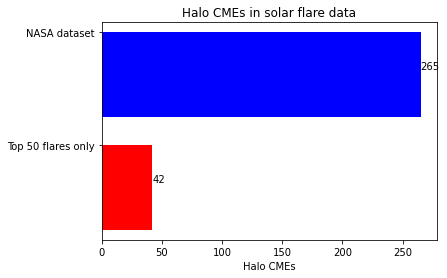

In [7]:
# Question 3

import matplotlib.pyplot as plot

cnt = 0 
top50cnt = 0

# find halo CMEs in entire NASA dataset and top 50 dataset
for i, j in df2.iterrows():
    if (j["is_halo"]) == "True":
        cnt += 1
for i, j in topflares.iterrows():
    if (j["is_halo"]) == "True":
        top50cnt += 1
        
# create bar chart
x = ["Top 50 flares only", "NASA dataset"]
y = [top50cnt, cnt]
fig, ax = plot.subplots()
width = 0.75
idx = np.arange(len(x))
ax.barh(idx, y, width, color= ["red", "blue"])
ax.set_yticks(idx + width / 2)

# title bar chart and axes
ax.set_title("Halo CMEs in solar flare data")
ax.set_xlabel("Halo CMEs")
ax.set_yticklabels(x)

# create bar labels
for i, v in enumerate(y):
    ax.text(v, i + .05, str(v), color = "black")

plot.show()